# Youtube Trend Video Analizi

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings # hataları ayıklayıp en aza indirgemek için 
from collections import Counter # sözlük yapısına benzer sıklık tablolarını görüntüleyebilmek için
import datetime  # zaman verileriyle çalışmak için
import wordcloud #kelime(string) yapısındaki verileri görselleştirmek için
import json #javascript object notation- anahtar-değer ilişkisini liste yapıda tutar. Bu yapıdaki verileri analiz edebilmek için

In [2]:
df = pd.read_csv("USvideos.csv")
PLOT_COLORS = ['#268bd2','#0052CC','#FF5722','#b58900','#003f5c']
pd.options.display.float_format='{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure',figsize=(8,5), dpi=100)
plt.rc('axes', labelpad=20, facecolor='#ffffff', linewidth=0.4,grid=True,labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major',width=0.2)
plt.rc('ytick.major',width=0.2)
plt.rc('grid',color='#9E9E9E', linewidth=0.4)
plt.rc('font',family='Arial',weight='400', size=10)
plt.rc('text',color='#282828')
plt.rc('savefig',pad_inches=0.3, dpi=300)

## Verileri Tanıma(Keşfetme)

In [3]:
df["description"]= df["description"].fillna(value="")
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


## Verileri Görüntüleme

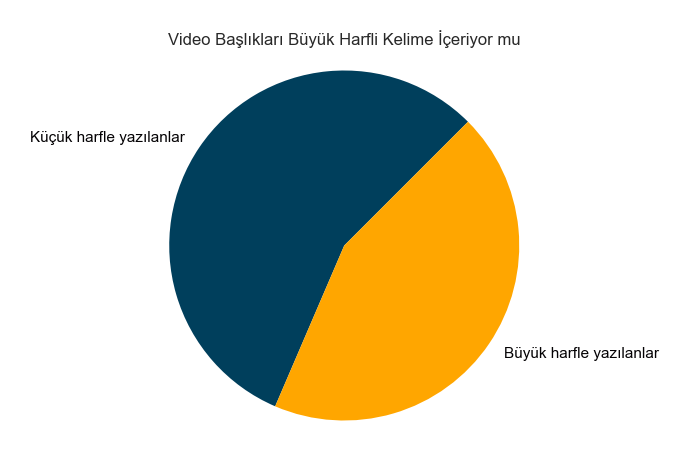

In [4]:
#trend videolardan kaç tane videonun başlığında en az bir harfli kelime olduğunu görmek istiyoruz.
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper(): # isupper= bir karakter dizisinin TAMAMININ büyük harf olup olmadığını kontrol eder.
            return True
    return False
#yukarıdaki fonksiyonu veri setimize uygulama- Contains_capitalized ismiyle apply fonksiyonu sayesinde contain_capitalized_wordfonksiyonunun veri setine uyguluyoruz.
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)
value_counts=df["contains_capitalized"].value_counts().to_dict()#verilerin counter kütüphanesi ile sayılara ve görsele dönüştürülmesi
fig , ax= plt.subplots()
_ = ax.pie([value_counts[False],value_counts[True]],labels=['Küçük harfle yazılanlar','Büyük harfle yazılanlar'],
          colors=['#003f5c','#ffa600'], textprops={'color':'#040204'},startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Video Başlıkları Büyük Harfli Kelime İçeriyor mu')

### Video Başlığının uzunluğunun analizi

C:\Users\Kaan Aksoy\AppData\Local\Temp\ipykernel_1700\1931852889.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["title_length"], kde=False, rug=False,


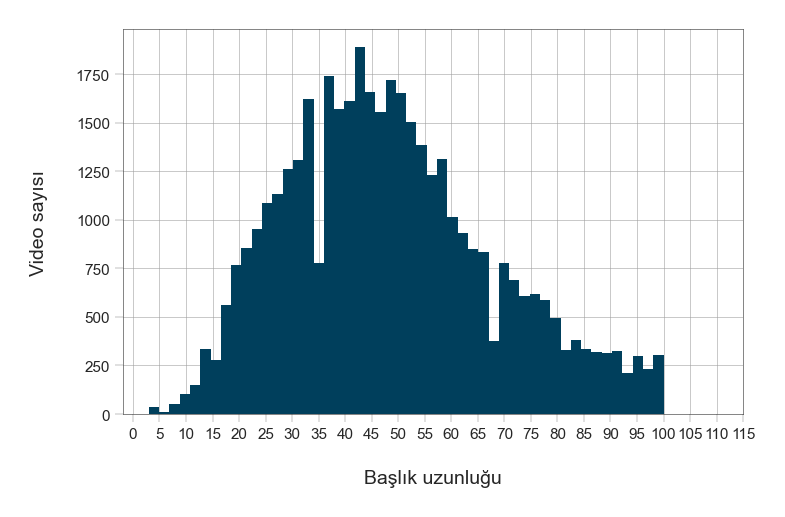

In [9]:
df["title_length"] = df["title"].apply(lambda x: len(x)) #title sütunundaki kelimelerin uzunluğunu lambda ve len fonksiyonlarıyla hesaplıyoruz. Sonrasında yeni bir sütun ekliyoruz

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False,
                color=PLOT_COLORS[4], hist_kws={'alpha':1},ax=ax) # KDE = Kernel Density Estimation Veri dağılımını özetler ve olasılık yoğunluk tahmini yapar. RUG = VEri setindeki bir verinin daağılımını gösterir
_ = ax.set(xlabel="Başlık uzunluğu",ylabel='Video sayısı',xticks=range(0,120,5))

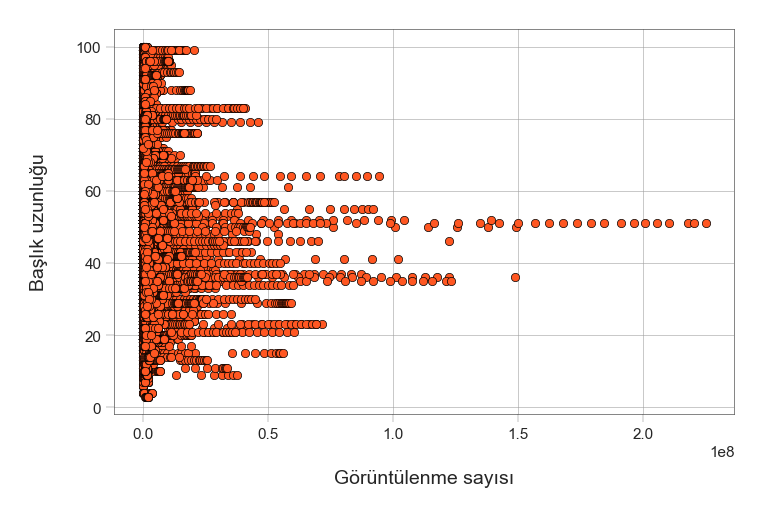

In [6]:
## Video başlık uzunluğuyla görüntülenme arasındaki ilişkiyi inceleyelim

fig,ax=plt.subplots()
_ = ax.scatter(x=df["views"], y=df["title_length"],color=PLOT_COLORS[2], edgecolor='#000000', linewidths=0.5)
_ = ax.set(xlabel="Görüntülenme sayısı", ylabel="Başlık uzunluğu")

### KORELASYON ANALİZİ

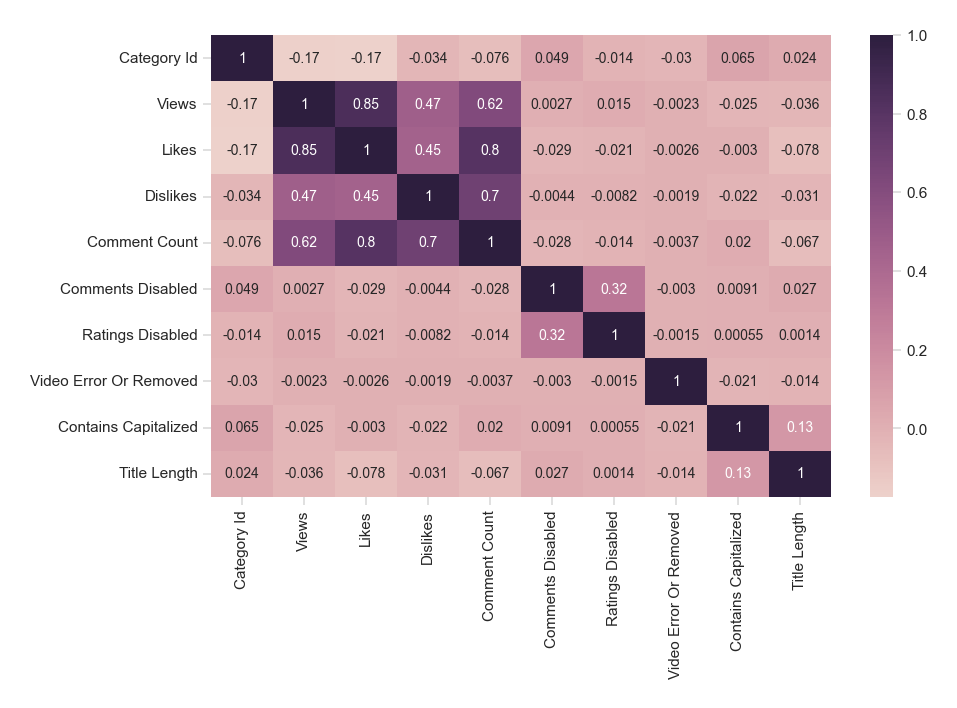

In [8]:
# Korelasyon iki farklı değer arasındaki ilişkiyi inceleyen istatistiksel kavramdır. Korelasyon katsayısı -1 ile 1 aralığındadır.
# Korelasyon sadece ilişkiyi belirler. Bu ilişkinin nedenini veya nedesel yönünü belirleyemez. 
# Mükemmel Negatif(-1) Bir değer artarken diğer değer düşüyorsa bu durumda mükemmel negatif korelasyon
# Mükemmel Pozitif(+1) Bir değer artarken diğer değer artıyorsa bu durumda mükemmel pozitif korelasyon
# Korelasyon yok (0) 

h_label =[x.replace('_', ' ').title() for x in
         list(df.select_dtypes(include=['number','bool']).columns.values)]
fig , ax= plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(numeric_only = True), annot=True, xticklabels=h_label, yticklabels=h_label, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax) #cmap=color map renk haritası anlamına gelir. 